In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import datetime as dt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Crypto/test_2/Ethereum/ETH-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,155.286407,156.691299,151.225342,152.539688,152.539688,6565950868
1,2019-12-01,152.491928,152.491928,147.067932,151.185730,151.185730,7102780298
2,2019-12-02,151.175476,152.116959,147.606796,149.059158,149.059158,6670561362
3,2019-12-03,149.058243,150.310425,146.001678,147.956421,147.956421,6204379850
4,2019-12-04,147.918381,150.680817,145.000885,146.747742,146.747742,7865937094
...,...,...,...,...,...,...,...
1092,2022-11-26,1198.790527,1227.038086,1198.097900,1205.897949,1205.897949,5074160558
1093,2022-11-27,1205.905273,1220.349487,1195.039063,1195.126953,1195.126953,4486976868
1094,2022-11-28,1194.960327,1198.737671,1156.062500,1170.086182,1170.086182,7275411870
1095,2022-11-29,1169.874390,1222.164185,1163.477539,1216.901245,1216.901245,7639405818


# **Data Pre-processing**

In [4]:
#Replace None or Null values with forward filling technique using fillna function.

data = data.fillna(method = 'ffill')

In [5]:
#Convert Date column into Datatime format

data['Date'] = pd.to_datetime(data.Date)

# **Data Visualization**

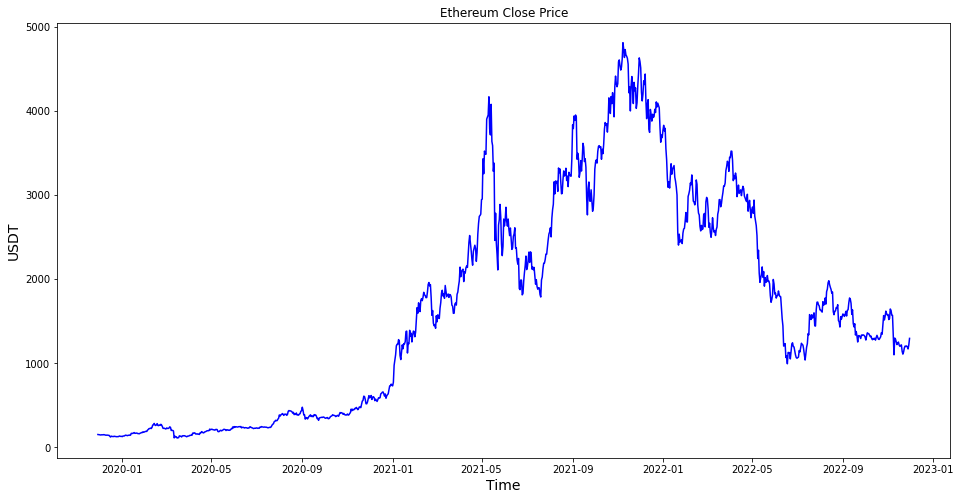

In [6]:
# Visualize the close price history
plt.figure(figsize=(16, 8))
plt.plot(data['Date'], data['Close'], color="blue")
plt.title('Ethereum Close Price')
plt.xlabel("Time", fontsize=14,)
plt.ylabel("USDT", fontsize=14)
plt.show()

# **Data Spliting**

In [7]:
data_training = data[data['Date']< '2022-03-30'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,155.286407,156.691299,151.225342,152.539688,152.539688,6565950868
1,2019-12-01,152.491928,152.491928,147.067932,151.185730,151.185730,7102780298
2,2019-12-02,151.175476,152.116959,147.606796,149.059158,149.059158,6670561362
3,2019-12-03,149.058243,150.310425,146.001678,147.956421,147.956421,6204379850
4,2019-12-04,147.918381,150.680817,145.000885,146.747742,146.747742,7865937094
...,...,...,...,...,...,...,...
846,2022-03-25,3108.448975,3183.958008,3087.490723,3106.671387,3106.671387,17030503831
847,2022-03-26,3106.405273,3146.825439,3091.825439,3143.178955,3143.178955,8876420740
848,2022-03-27,3143.795654,3291.577637,3129.997803,3291.577637,3291.577637,13431866834
849,2022-03-28,3292.322510,3424.019287,3279.027100,3336.634521,3336.634521,20620450770


In [8]:
data_test = data[data['Date']> '2022-03-30'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
852,2022-03-31,3385.289307,3435.128418,3272.934570,3281.642822,3281.642822,17685495686
853,2022-04-01,3282.576172,3467.555908,3223.891357,3449.552246,3449.552246,20982988937
854,2022-04-02,3449.788574,3521.284668,3442.000244,3445.059326,3445.059326,23571556215
855,2022-04-03,3444.810547,3573.960205,3421.259766,3522.833496,3522.833496,15333808649
856,2022-04-04,3522.364990,3535.148193,3422.000977,3521.241211,3521.241211,18209969743
...,...,...,...,...,...,...,...
1092,2022-11-26,1198.790527,1227.038086,1198.097900,1205.897949,1205.897949,5074160558
1093,2022-11-27,1205.905273,1220.349487,1195.039063,1195.126953,1195.126953,4486976868
1094,2022-11-28,1194.960327,1198.737671,1156.062500,1170.086182,1170.086182,7275411870
1095,2022-11-29,1169.874390,1222.164185,1163.477539,1216.901245,1216.901245,7639405818


# **Feature Engineering**

In [9]:
#feature selection
training_data = data_training.drop(['Date', 'Adj Close'], axis = 1)
training_data.head()

,Open,High,Low,Close,Volume
0,155.286407,156.691299,151.225342,152.539688,6565950868
1,152.491928,152.491928,147.067932,151.185730,7102780298
2,151.175476,152.116959,147.606796,149.059158,6670561362
3,149.058243,150.310425,146.001678,147.956421,6204379850
4,147.918381,150.680817,145.000885,146.747742,7865937094


In [10]:
#Normalizing training_data
scaler=MinMaxScaler()
training_data = scaler.fit_transform(training_data)
print(training_data.shape)

(851, 5)


In [11]:
# we keep the training set as 70% and 30% testing set

training_size=int(len(training_data)*0.70)
test_size=len(training_data)-training_size
train_data,test_data=training_data[0:training_size],training_data[training_size:len(training_data)]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (595, 5)
test_data:  (256, 5)


In [12]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 30
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (564, 30)
y_train:  (564,)
X_test:  (225, 30)
y_test (225,)


In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (564, 30, 1)
X_test:  (225, 30, 1)


# Model Building

In [15]:
model = Sequential()
model.add(LSTM(128, return_sequences = True, input_shape=(None,1)))
model.add(LSTM(64, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 128)         66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test,y_test),
                    epochs=50,
                    batch_size=32,
                    verbose=1)

Epoch 1/50
18/18 [==============================] - 7s 130ms/step - loss: 0.0168 - val_loss: 0.0119
Epoch 2/50
18/18 [==============================] - 1s 71ms/step - loss: 0.0024 - val_loss: 0.0039
Epoch 3/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0016 - val_loss: 0.0049
Epoch 4/50
18/18 [==============================] - 1s 71ms/step - loss: 0.0014 - val_loss: 0.0035
Epoch 5/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0014 - val_loss: 0.0064
Epoch 6/50
18/18 [==============================] - 1s 76ms/step - loss: 0.0013 - val_loss: 0.0032
Epoch 7/50
18/18 [==============================] - 1s 72ms/step - loss: 0.0013 - val_loss: 0.0030
Epoch 8/50
18/18 [==============================] - 1s 71ms/step - loss: 0.0011 - val_loss: 0.0056
Epoch 9/50
18/18 [==============================] - 1s 71ms/step - loss: 0.0010 - val_loss: 0.0076
Epoch 10/50
18/18 [==============================] - 1s 71ms/step - loss: 0.0011 - val_loss: 0.0047
Epoch 11

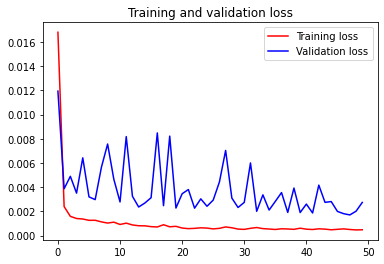

<Figure size 432x288 with 0 Axes>

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

# **Performance Evaluation**

In [18]:
# prediction and check performance metrics

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

print("train_predict: ", train_predict.shape)
print("test_predict: ", test_predict.shape)

8/8 [==============================] - 0s 21ms/step
train_predict:  (564, 1)
test_predict:  (225, 1)


In [19]:
# Transform back to original form

# train_predict = scaler.inverse_transform(train_predict)
# test_predict = scaler.inverse_transform(test_predict)
# original_ytrain = scaler.inverse_transform(y_train) 
# original_ytest = scaler.inverse_transform(y_test)

In [20]:
# Evaluation metrices RMSE, MSE and MAE for train data
print("Train data RMSE: ", math.sqrt(mean_squared_error(y_train,train_predict)))
print("Train data MSE: ", mean_squared_error(y_train,train_predict))
print("Train data MAE: ", mean_absolute_error(y_train,train_predict))
print("Train data R2 score:", r2_score(y_train, train_predict))


Train data RMSE:  0.02044179840122461
Train data MSE:  0.000417867121876309
Train data MAE:  0.011255547974415936
Train data R2 score: 0.9894991343033224


In [21]:
print("Test data RMSE: ", math.sqrt(mean_squared_error(y_test,test_predict)))
print("Test data MSE: ", mean_squared_error(y_test,test_predict))
print("Test data MAE: ", mean_absolute_error(y_test,test_predict))
print("Test data R2 score:", r2_score(y_test, test_predict))

Test data RMSE:  0.05229342061990683
Test data MSE:  0.0027346018401304966
Test data MAE:  0.042557180932387646
Test data R2 score: 0.8497341052140632


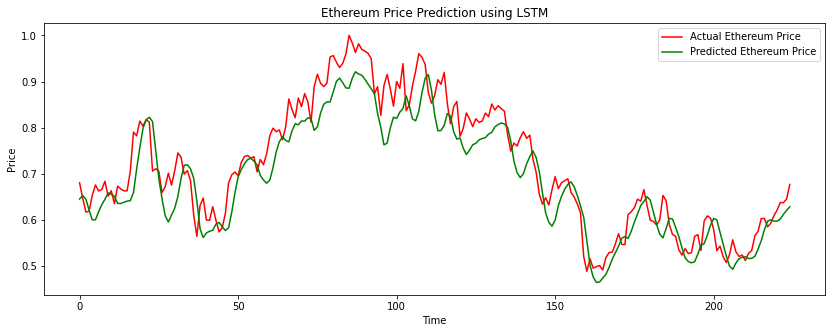

In [22]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Actual Ethereum Price')
plt.plot(test_predict, color = 'green', label = 'Predicted Ethereum Price')
plt.title('Ethereum Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()